In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
plt.style.use('ggplot')

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, BatchNormalization, Dropout, LSTM, Embedding, GlobalMaxPool1D
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
df = pd.read_csv('tcc_ceds_music.csv')

In [4]:
df.head()

Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadness  feelings  danceability  loudness  acousticness  \
0    0.000598  ...  0.380299  0.117175      0.357739  0.454119      0.997992   
1    0.443435  ...  0.001284  0.001284      0.331745  0.647540      0.954819   
2    0.002770  ...  0.002770  0.225422      0.456298  0.585288      0.840361   
3    0.001548  ...  0.225889  0.001548      0.686992  0.744404      0.083935   
4    0.417772  ...  0.068800  0.001350      0.291671  0.646489      0.975904   

   instrumentalness   valence    energy       topic  age  
0          0.901822  0.339448  0.137110     sadness  1.0  
1          0.000002  0.325021  0.263240  world/life  1.0  
2          0.000000  0.351814  0.139112       music  1.0  
3          0.199393  0.775350  0.743736    romantic  1.0  
4          0.000246  0.597073  0.394375    romantic  1.0  

[5 rows x 31 columns]

In [5]:
df.shape

(28372, 31)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

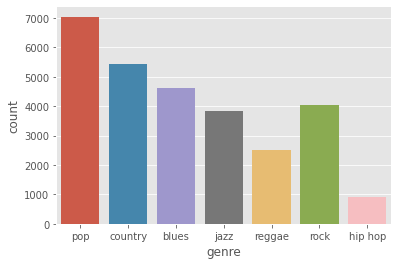

In [6]:
sns.countplot('genre',data=df)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

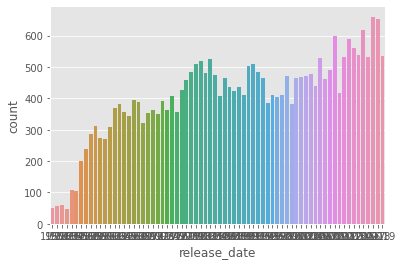

In [7]:
sns.countplot('release_date',data=df)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

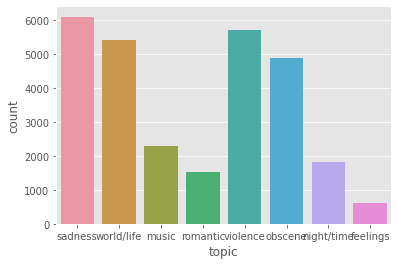

In [8]:
sns.countplot('topic',data=df)

In [9]:
# clean = []
# stop_words = stopwords.words('english')
# stop_words.append('chorus')
# stop_words.append('verse')
# lemmatizer = WordNetLemmatizer()

In [10]:
# for index, row in df.iterrows():
#     lyrics = row['lyrics']
#     lyrics = re.sub('\n', "", lyrics)
#     lyrics = re.sub('x1', "", lyrics)
#     lyrics = re.sub('x2', "", lyrics)
#     lyrics = re.sub('x3', "", lyrics)
#     lyrics = re.sub('x4', "", lyrics)
#     lyrics = re.sub('x5', "", lyrics)
#     lyrics = re.sub('x6', "", lyrics)
#     lyrics = re.sub('x7', "", lyrics)
#     lyrics = re.sub('x8', "", lyrics)
#     lyrics = re.sub('x9', "", lyrics)
#     lyrics = lyrics.lower() #lowercasing
#     lyrics = re.sub("[^a-z]+", " ", lyrics) #remove all numbers and special chars
#     lyrics = lyrics.split()
#     lyrics = [word for word in lyrics if not word in stop_words] #remove stopwords
#     lyrics = [lemmatizer.lemmatize(token) for token in lyrics] #lemmatize
#     lyrics = [lemmatizer.lemmatize(token, "v") for token in lyrics]
#     lyrics = " ".join(lyrics)
#     clean.append(lyrics)
# df['clean_lyrics'] = clean #add clean lyrics to a new column in the dataframe

In [11]:
pop = ' '.join(df[df.genre == 'pop'].lyrics.values)
country = ' '.join(df[df.genre == 'country'].lyrics.values)
blues = ' '.join(df[df.genre == 'blues'].lyrics.values)
jazz = ' '.join(df[df.genre == 'jazz'].lyrics.values)
reggae = ' '.join(df[df.genre == 'reggae'].lyrics.values)
rock = ' '.join(df[df.genre == 'rock'].lyrics.values)
hiphop = ' '.join(df[df.genre == 'hip hop'].lyrics.values)

In [12]:
sadness = ' '.join(df[df.topic == 'sadness'].lyrics.values)
worldlife = ' '.join(df[df.topic == 'world/life'].lyrics.values)
music = ' '.join(df[df.topic == 'music'].lyrics.values)
romantic = ' '.join(df[df.topic == 'romantic'].lyrics.values)
violence = ' '.join(df[df.topic == 'violence'].lyrics.values)
obscene = ' '.join(df[df.topic == 'obscene'].lyrics.values)
nighttime = ' '.join(df[df.topic == 'night/time'].lyrics.values)
feelings = ' '.join(df[df.topic == 'feelings'].lyrics.values)

Text(0.5, 1.0, 'Pop')

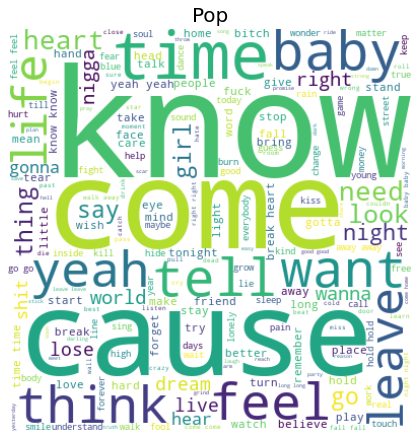

In [13]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(pop)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Pop', size=20)

Text(0.5, 1.0, 'Country')

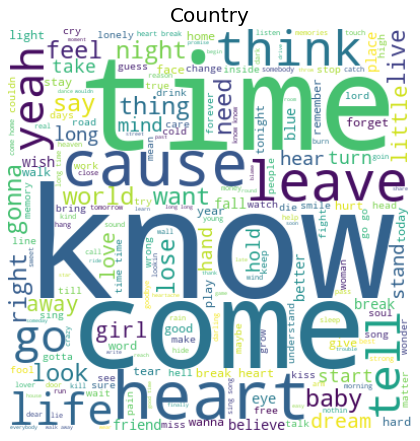

In [14]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(country)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Country', size=20)

Text(0.5, 1.0, 'Blues')

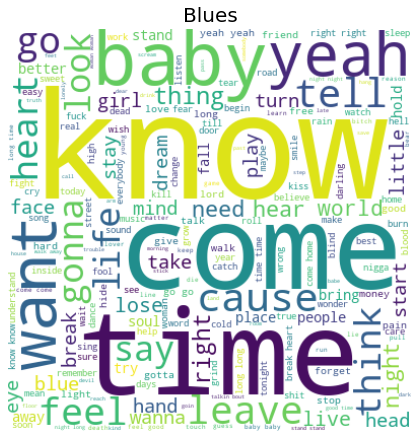

In [15]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(blues)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Blues', size=20)

Text(0.5, 1.0, 'Jazz')

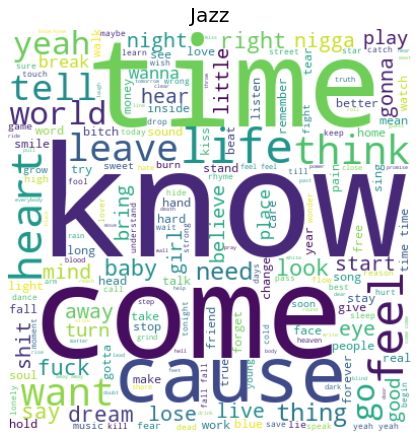

In [16]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(jazz)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Jazz', size=20)

Text(0.5, 1.0, 'Reggae')

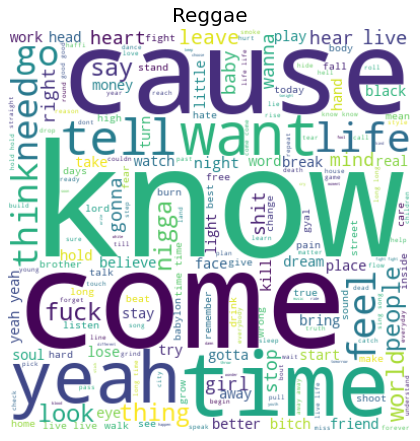

In [17]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(reggae)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Reggae', size=20)

Text(0.5, 1.0, 'Rock')

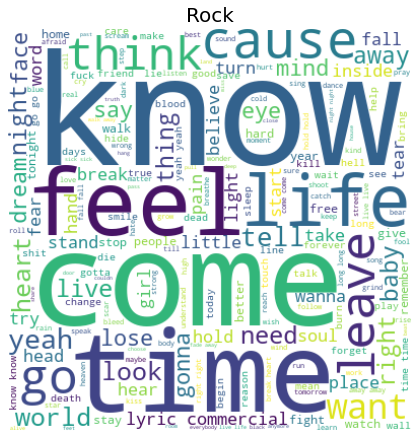

In [18]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(rock)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Rock', size=20)

Text(0.5, 1.0, 'Hip Hop')

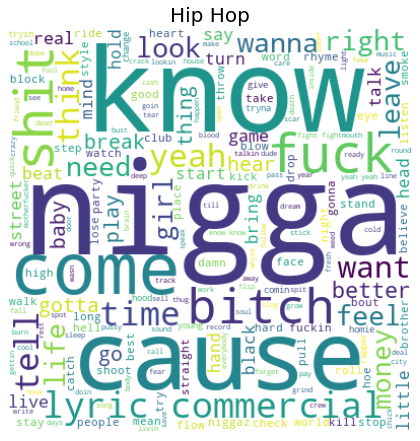

In [19]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(hiphop)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Hip Hop', size=20)

In [20]:
sadness = ' '.join(df[df.topic == 'sadness'].lyrics.values)
worldlife = ' '.join(df[df.topic == 'world/life'].lyrics.values)
music = ' '.join(df[df.topic == 'music'].lyrics.values)
romantic = ' '.join(df[df.topic == 'romantic'].lyrics.values)
violence = ' '.join(df[df.topic == 'violence'].lyrics.values)
obscene = ' '.join(df[df.topic == 'obscene'].lyrics.values)
nighttime = ' '.join(df[df.topic == 'night/time'].lyrics.values)
feelings = ' '.join(df[df.topic == 'feelings'].lyrics.values)

Text(0.5, 1.0, 'Sadness')

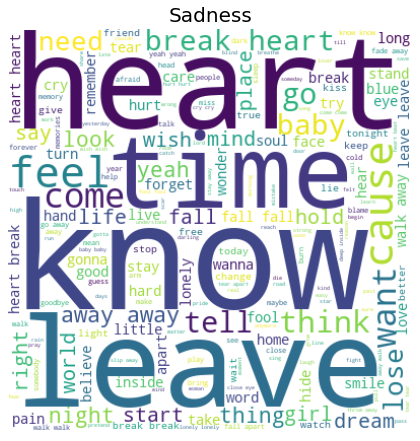

In [21]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(sadness)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Sadness', size=20)

Text(0.5, 1.0, 'World/Life')

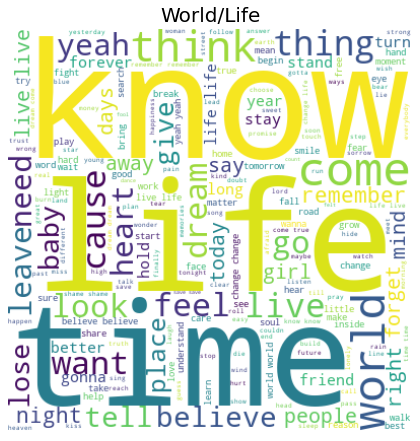

In [22]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(worldlife)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('World/Life', size=20)

Text(0.5, 1.0, 'Music')

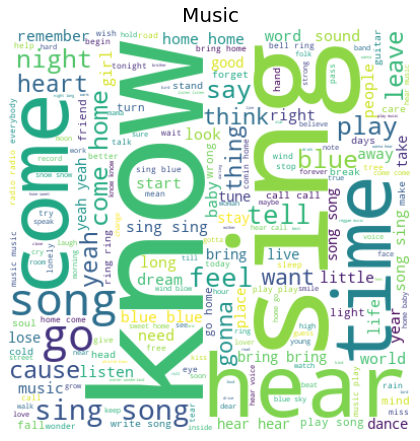

In [23]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(music)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Music', size=20)

Text(0.5, 1.0, 'Romantic')

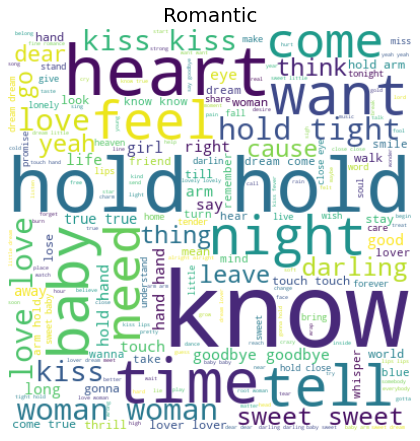

In [24]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(romantic)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Romantic', size=20)

Text(0.5, 1.0, 'Violence')

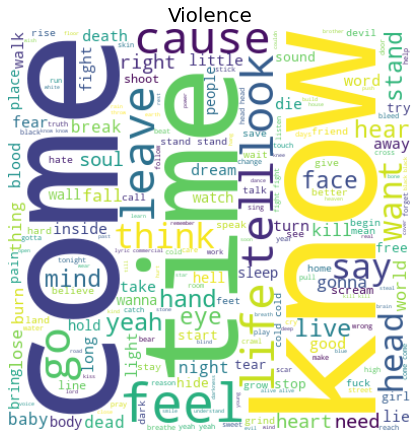

In [25]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(violence)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Violence', size=20)

Text(0.5, 1.0, 'Obscene')

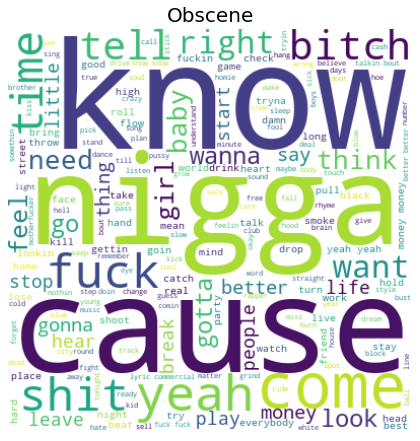

In [26]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(obscene)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Obscene', size=20)

Text(0.5, 1.0, 'Night/Time')

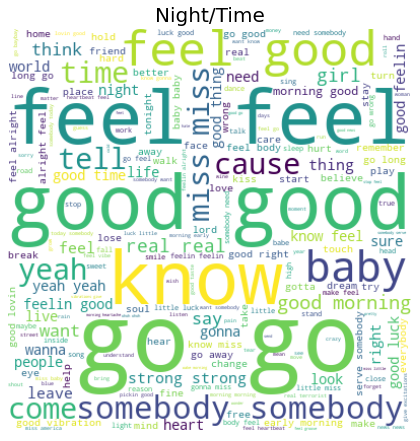

In [27]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(feelings)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Night/Time', size=20)

Text(0.5, 1.0, 'Feelings')

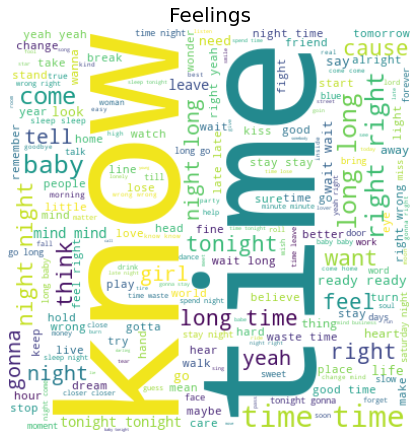

In [28]:
plt.figure(figsize=(16, 8))
cloud1 = WordCloud(width=400, height=400, background_color='white').generate(nighttime)
plt.subplot(121)
plt.imshow(cloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Feelings', size=20)

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

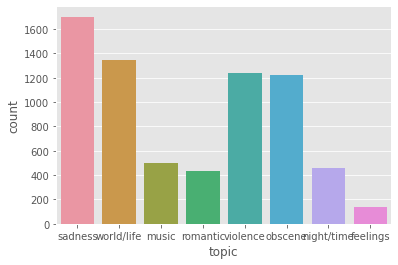

In [29]:
sns.countplot('topic',data=df[df.genre == 'pop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

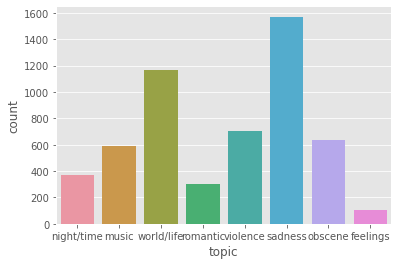

In [30]:
sns.countplot('topic',data=df[df.genre == 'country'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

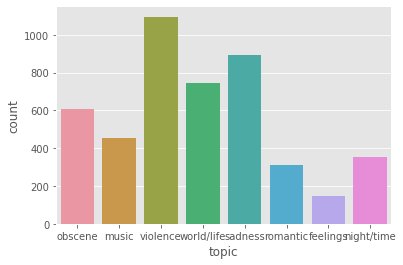

In [31]:
sns.countplot('topic',data=df[df.genre == 'blues'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

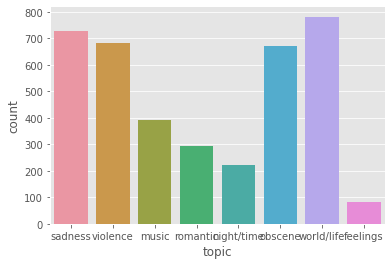

In [32]:
sns.countplot('topic',data=df[df.genre == 'jazz'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

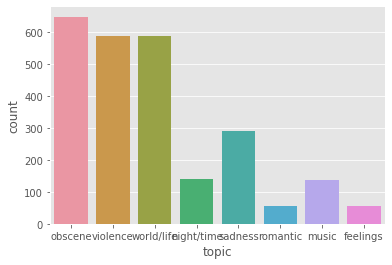

In [33]:
sns.countplot('topic',data=df[df.genre == 'reggae'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

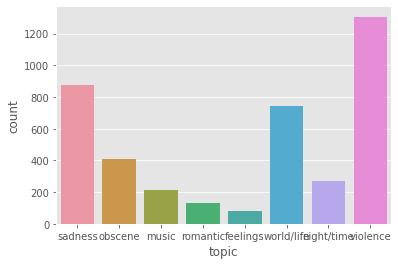

In [34]:
sns.countplot('topic',data=df[df.genre == 'rock'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='topic', ylabel='count'>

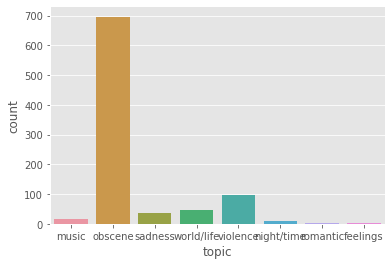

In [35]:
sns.countplot('topic',data=df[df.genre == 'hip hop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

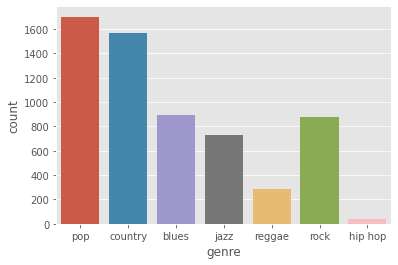

In [36]:
sns.countplot('genre',data=df[df.topic == 'sadness'])

<AxesSubplot:xlabel='genre', ylabel='count'>

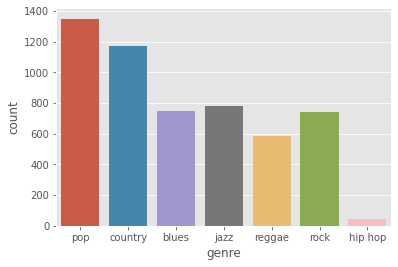

In [38]:
sns.countplot('genre',data=df[df.topic == 'world/life'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

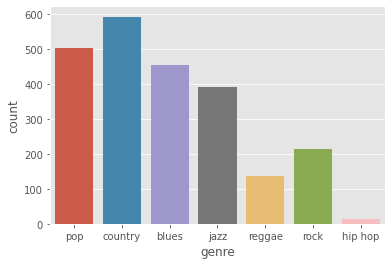

In [39]:
sns.countplot('genre',data=df[df.topic == 'music'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

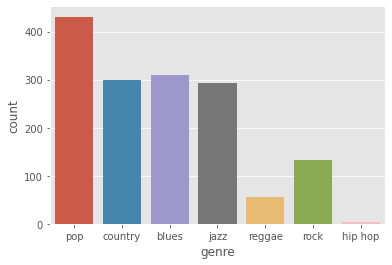

In [40]:
sns.countplot('genre',data=df[df.topic == 'romantic'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

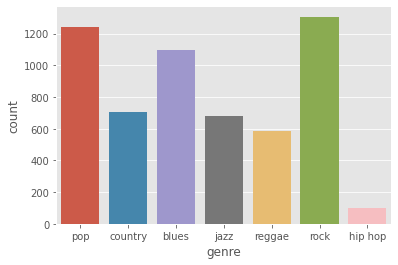

In [41]:
sns.countplot('genre',data=df[df.topic == 'violence'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

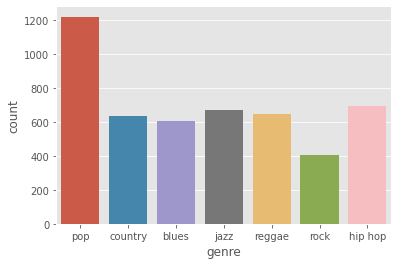

In [42]:
sns.countplot('genre',data=df[df.topic == 'obscene'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

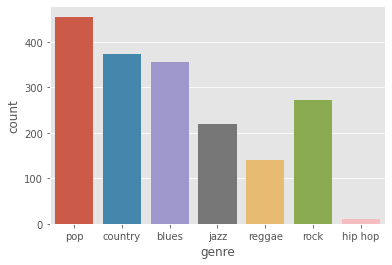

In [43]:
sns.countplot('genre',data=df[df.topic == 'night/time'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='genre', ylabel='count'>

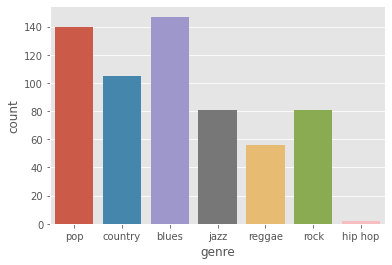

In [44]:
sns.countplot('genre',data=df[df.topic == 'feelings'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

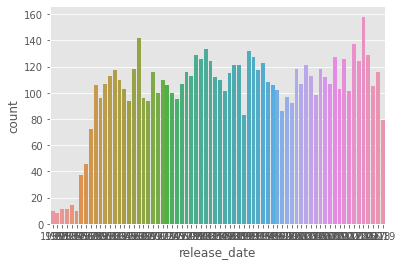

In [45]:
sns.countplot('release_date',data=df[df.genre == 'pop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

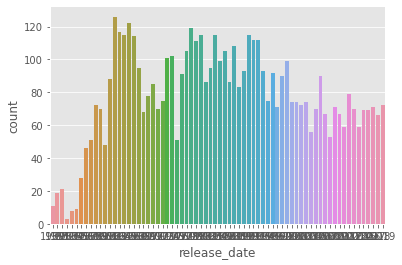

In [46]:
sns.countplot('release_date',data=df[df.genre == 'country'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

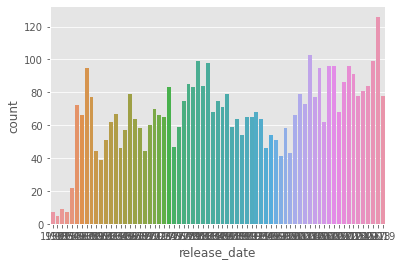

In [47]:
sns.countplot('release_date',data=df[df.genre == 'blues'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

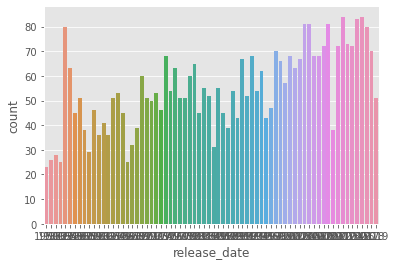

In [48]:
sns.countplot('release_date',data=df[df.genre == 'jazz'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

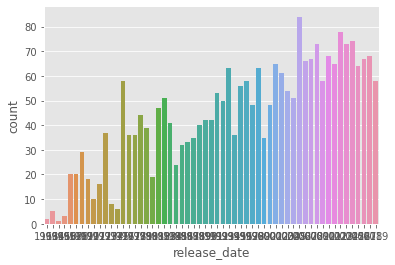

In [49]:
sns.countplot('release_date',data=df[df.genre == 'reggae'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

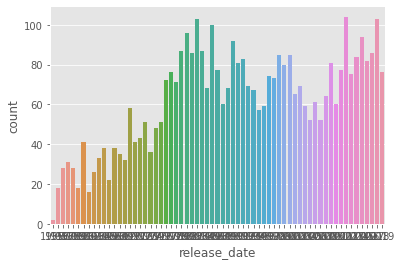

In [50]:
sns.countplot('release_date',data=df[df.genre == 'rock'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

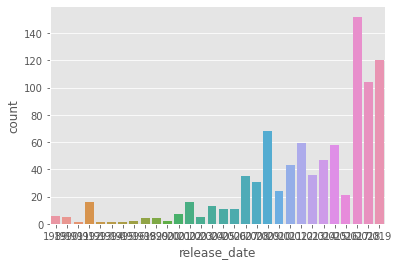

In [51]:
sns.countplot('release_date',data=df[df.genre == 'hip hop'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

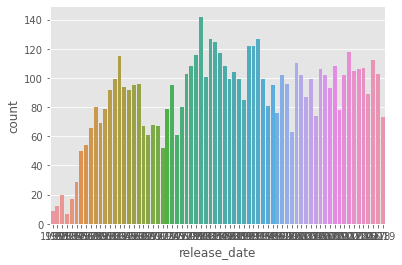

In [52]:
sns.countplot('release_date',data=df[df.topic == 'sadness'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

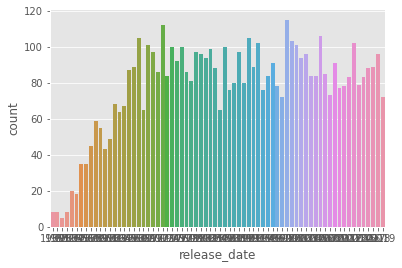

In [53]:
sns.countplot('release_date',data=df[df.topic == 'world/life'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

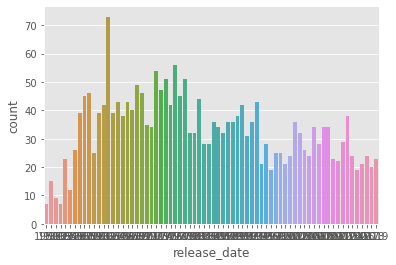

In [54]:
sns.countplot('release_date',data=df[df.topic == 'music'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

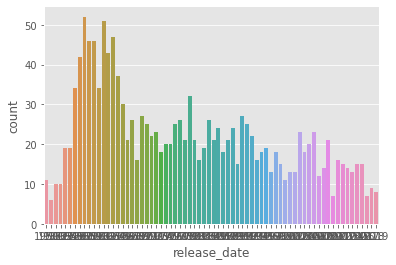

In [55]:
sns.countplot('release_date',data=df[df.topic == 'romantic'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

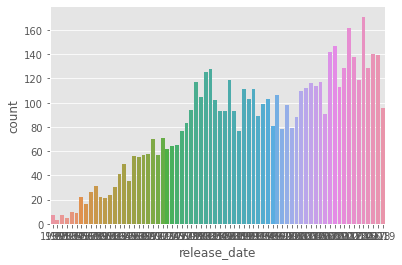

In [56]:
sns.countplot('release_date',data=df[df.topic == 'violence'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

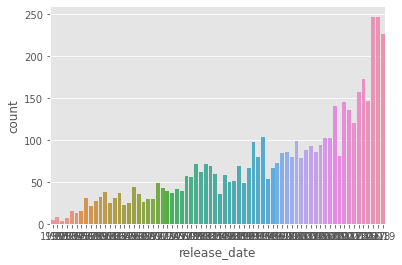

In [57]:
sns.countplot('release_date',data=df[df.topic == 'obscene'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

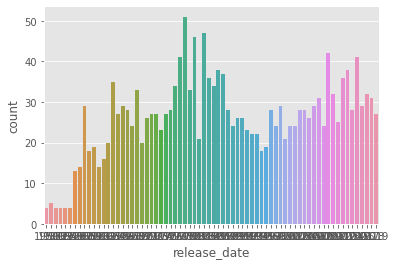

In [58]:
sns.countplot('release_date',data=df[df.topic == 'night/time'])

e:\nlp2\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_date', ylabel='count'>

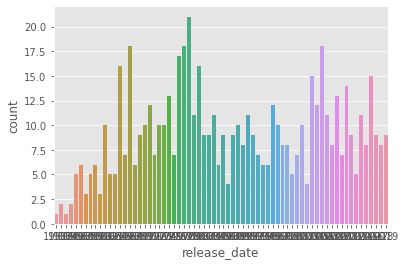

In [59]:
sns.countplot('release_date',data=df[df.topic == 'feelings'])